In [1]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('../breath_db.sqlite')

# Load the breath_segments table into a DataFrame
df = pd.read_sql_query("SELECT * FROM breath_segments", conn)

# Print the first 5 entries
print(df.head())

# Close the connection
conn.close()

   id                                        source_file  breath  \
0  11  rsc_P0_AURA_deep_breathing_20250608_210512_ali...       1   
1  12  rsc_P0_AURA_deep_breathing_20250608_210512_ali...       2   
2  13  rsc_P0_AURA_deep_breathing_20250608_210512_ali...       3   
3  14  rsc_P0_AURA_deep_breathing_20250608_210512_ali...       4   
4  15  rsc_P0_AURA_deep_breathing_20250608_210512_ali...       5   

   breath_start_us  breath_end_us  protection_factor  
0       3774405733     3782723136         489.320415  
1       3782724157     3791978237          40.944095  
2       3791979259     3800914365          38.619085  
3       3800915386     3811512393         301.163299  
4       3811513414     3821262493         443.577109  


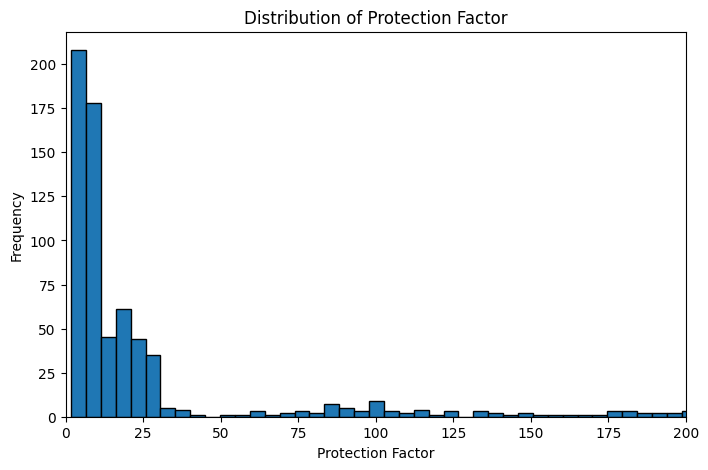

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df['protection_factor'], bins=1000, edgecolor='black')
plt.xlabel('Protection Factor')
plt.ylabel('Frequency')
plt.title('Distribution of Protection Factor')
plt.xlim(0, 200)
plt.show()

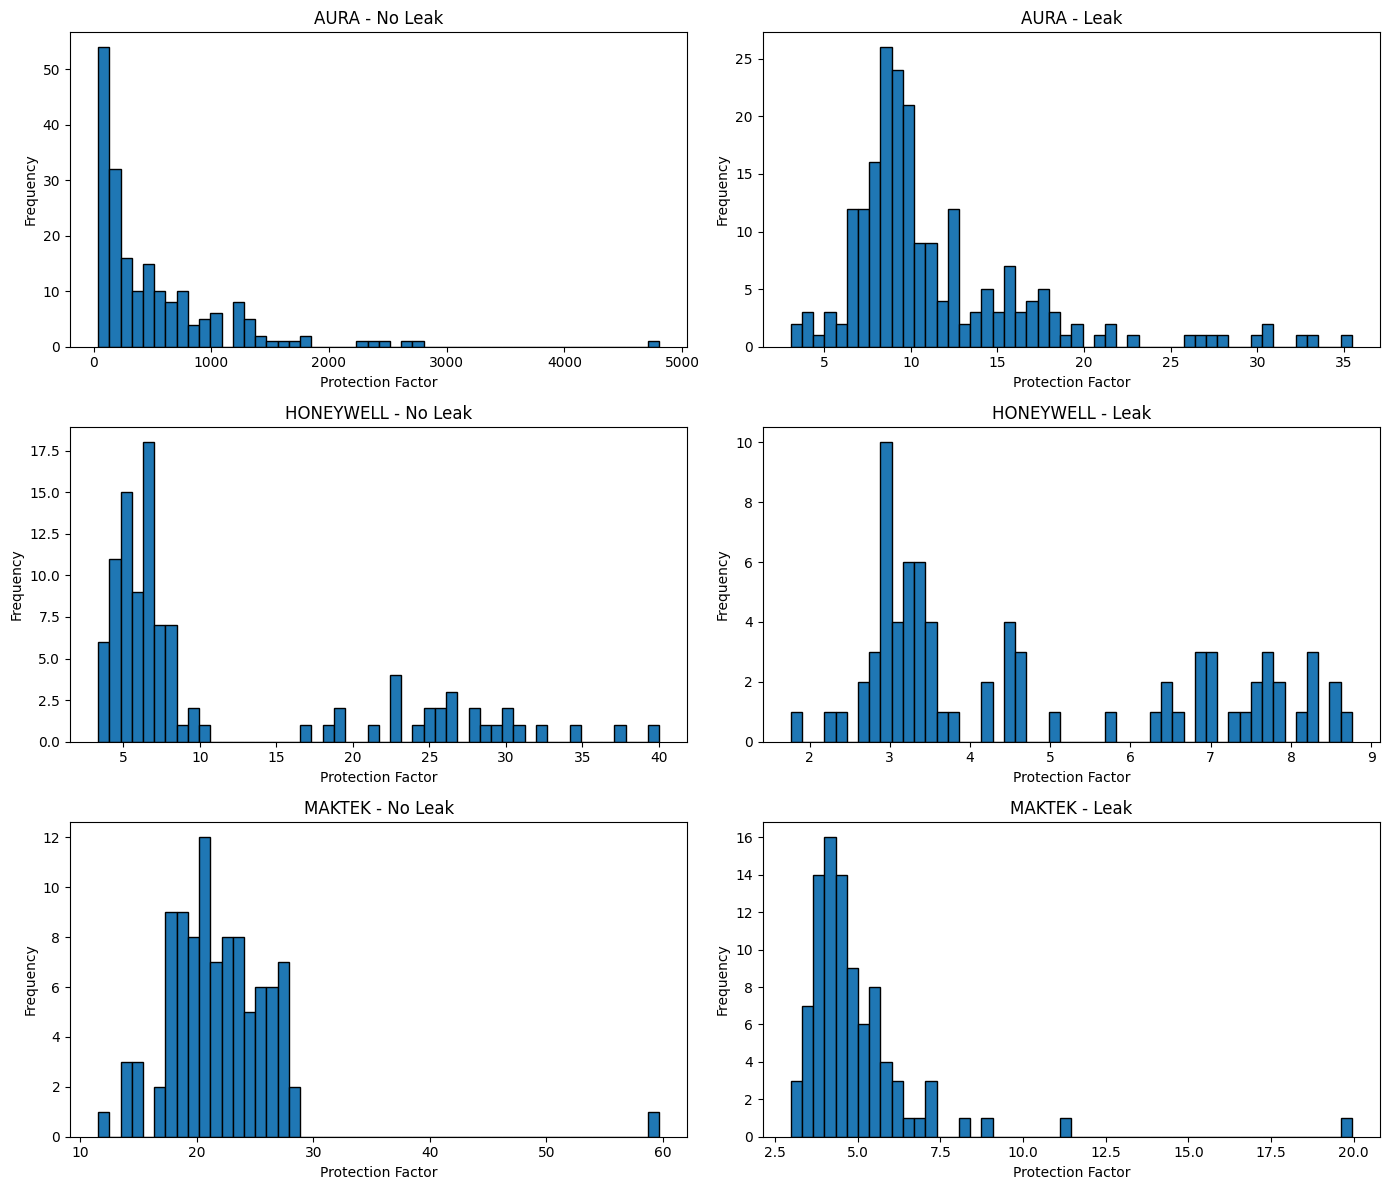

In [8]:
import re

# Extract mask type and fit condition from source_file
def extract_mask_and_fit(filename):
    # Example filename: rsc_P0_AURA_deep_breathing_20250608_210512_ali...
    mask_types = ['AURA', 'HONEYWELL', 'MAKTEK']
    fit_conditions = ['leak', 'no_leak']
    mask = next((m for m in mask_types if m in filename), 'UNKNOWN')
    fit = 'leak' if 'leak' in filename.lower() else 'no_leak'
    return mask, fit

df[['mask_type', 'fit_condition']] = df['source_file'].apply(
    lambda x: pd.Series(extract_mask_and_fit(x))
)

# Plot histograms
fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=False, sharey=False)
mask_types = ['AURA', 'HONEYWELL', 'MAKTEK']
fit_conditions = ['no_leak', 'leak']

for i, mask in enumerate(mask_types):
    for j, fit in enumerate(fit_conditions):
        ax = axes[i, j]
        subset = df[(df['mask_type'] == mask) & (df['fit_condition'] == fit)]
        ax.hist(subset['protection_factor'], bins=50, edgecolor='black')
        ax.set_title(f"{mask} - {fit.replace('_', ' ').title()}")
        ax.set_xlabel('Protection Factor')
        ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()